In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [2]:
#load data
df = pd.read_csv('ALS_TrainingData_2223.csv')

## EDA

#### Exploring and Analayzing dataset:

In [3]:
#head to explore
df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [4]:
#check shape()
df.shape

(2223, 101)

In [5]:
#Check nulls
df.isnull().sum().sum()

0

In [6]:
#Remove duplicates
df = df.drop_duplicates()

In [7]:
#explore
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB


In [8]:
df.describe()

#Describe statistics of data 
#Notice that we have different range of data so I will need to normalzie the data.
#Notic that ages is between 18 and 81

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,...,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,...,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,...,112.000000,0.000000,533.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,614.500000,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,...,135.000000,0.010582,240825.500000,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,1213.000000,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,...,137.000000,0.013123,496835.000000,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,1815.500000,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,...,138.000000,0.017278,750300.500000,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,2424.000000,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,...,145.000000,0.142857,999482.000000,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


In [9]:
#Exploring the values of ALSFRS_SLOPE
li=[]
for i in (df["ALSFRS_slope"]):
    if i not in li:
        li.append(i)
    
print(li)

[-0.965608466, -0.921717172, -0.914786967, -0.598360656, -0.444038929, -0.118352789, -1.225579976, -0.760416667, -1.010147601, -0.10786052, -0.108630952, -0.735887097, -0.330615942, -0.350961538, -0.557081807, -0.296266234, -1.086309524, 0.0, -0.953832753, -0.506944444, -1.200657895, -0.792616721, 0.110205314, -0.482804233, -0.404208195, -0.977678571, -0.993197279, -0.217261905, -1.433782267, -0.21882494, -2.628600823, 0.105613426, -1.002747253, -1.212258454, -0.724206349, -0.894607843, -0.805147059, -0.379023884, -0.533625731, -0.928753181, -1.114163614, -0.517290249, -0.467948718, -0.592532468, -0.495385451, -0.32823741, -2.027777778, -0.749706573, -1.254295533, -0.329422383, -0.987554113, -1.396174863, -0.241402116, -0.343045113, -0.687382298, -1.185064935, -1.110097324, -0.222832723, -1.106060606, -0.325892857, -0.647163121, -0.311965812, 0.330615942, -0.214958775, -0.832066869, -0.774242424, -0.245295699, -0.348016781, -1.365646259, -0.197510823, -1.210967994, -0.65647482, -0.8516

In [10]:
#Check highest corralation between data
df.corrwith(df["ALSFRS_slope"]).sort_values( ascending=False)

ALSFRS_slope          1.000000
ALSFRS_Total_min      0.601810
trunk_min             0.488530
mouth_min             0.435538
hands_min             0.424107
                        ...   
mouth_range          -0.553194
leg_range            -0.584507
hands_range          -0.632350
trunk_range          -0.686407
ALSFRS_Total_range   -0.819305
Length: 101, dtype: float64

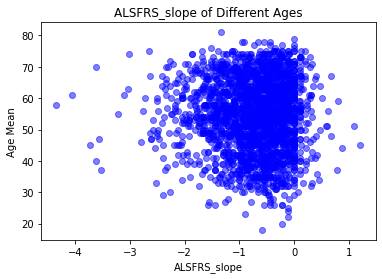

In [11]:
#The relationship between patient age and his ALSFRS slpe
plt.scatter(df['ALSFRS_slope'],df['Age_mean'], c='b', alpha=0.5)
plt.ylabel('Age Mean')
plt.xlabel('ALSFRS_slope')
plt.title("ALSFRS_slope of Different Ages")
plt.show()

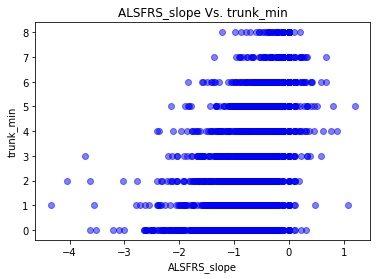

In [12]:
#The relationship between ALSFRS_slope and trunk_min
plt.scatter( df["ALSFRS_slope"],df["trunk_min"], c='b', alpha=0.5)
plt.ylabel('trunk_min')
plt.xlabel('ALSFRS_slope')
plt.title("ALSFRS_slope Vs. trunk_min")
plt.show()

In [13]:
#Before starting working on the model I should drop columns that has no effect  on data such as IDs
df.drop(['ID'], axis=1, inplace=True) 
df.drop(['SubjectID'], axis=1, inplace=True) 
df

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.00,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.00,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.00,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.00,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,0.009107,...,141.0,136.0,0.014035,7,5.0,5,0.003643,7.00,6.0,5.0
2219,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,0.025408,...,143.0,141.0,0.009074,5,4.0,3,0.003630,7.41,5.5,5.0
2220,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,0.010949,...,141.0,135.0,0.013123,5,4.0,4,0.001825,9.00,6.0,5.0
2221,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,0.023214,...,139.0,136.0,0.007143,8,4.5,2,0.010714,6.00,5.0,5.0


### Machine Learning: Clustring 

In [14]:
# Scale Data
X = df.drop(['ALSFRS_slope'], axis=1) 
# Fit & transform data.
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)
y_kmeans = km.fit_predict(X)

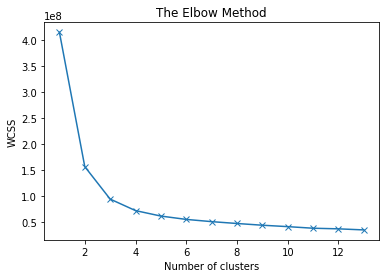

In [15]:
# Create Elbow Plot
# The elbow method depends on Within Cluster Sum of Squares
wcss = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 14), wcss, marker='x')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#Based on the Elbow 4 or 3 is the best k

### Because we have a lot of features ( dimentions ) we need to use PCA

In [16]:
#Normalization 
# it is necessary to normalize data before performing PCA
nrmlzd = StandardScaler()
data =nrmlzd.fit_transform(X)

In [17]:
data
#Check range

array([[ 0.91713698,  3.08941722, -1.30078105, ..., -0.88037551,
         0.46305355,  1.86853157],
       [-0.57487867, -0.62201561, -1.11240084, ...,  0.1926645 ,
        -1.13720768, -0.41915124],
       [-1.45253494,  0.92441474,  1.14816173, ..., -0.88037551,
        -1.13720768, -0.41915124],
       ...,
       [-0.6626443 , -0.31272954,  0.01788044, ...,  2.33874452,
         0.46305355, -0.41915124],
       [-1.54030057,  0.61512867,  0.01788044, ..., -0.88037551,
        -1.13720768, -0.41915124],
       [-0.57487867,  0.3058426 ,  0.39464087, ..., -1.95341552,
        -1.13720768, -0.41915124]])

In [18]:
#pca
pca = PCA(2)
data = pca.fit_transform(data)

In [19]:
#Notice values dimentions 
data

array([[-1.60590296, -2.37043778],
       [-1.55110775, -4.89466316],
       [ 1.66539724, -0.38567187],
       ...,
       [-0.17951649,  4.2814798 ],
       [-0.37803158,  3.31748668],
       [ 0.9161283 ,  0.50556197]])

In [20]:
#Building the model:
#Based on Elbow method 3 or 4 is best
kmeans_1 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 20)
kmeans_1.fit(data)
y_kmeans1 = kmeans_1.predict(data)

In [21]:
#Check preduction 
y_kmeans1

array([0, 0, 1, ..., 2, 2, 2])

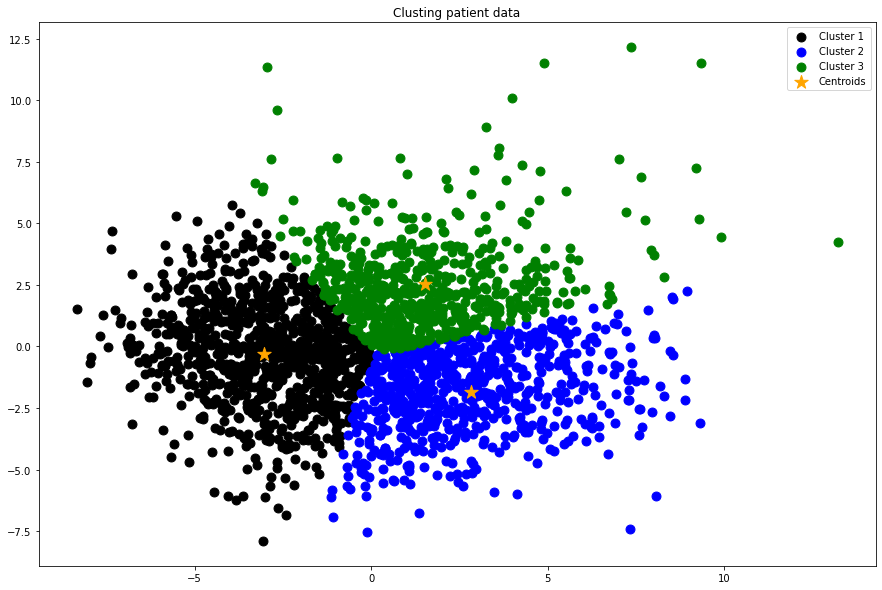

In [22]:
#Visualize the clusters 
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(data[y_kmeans1 == 0, 0], data[y_kmeans1 == 0, 1], s = 80, c = 'black', label = 'Cluster 1')

plt.scatter(data[y_kmeans1 == 1, 0], data[y_kmeans1 == 1, 1], s = 80, c = 'blue', label = 'Cluster 2')

plt.scatter(data[y_kmeans1 == 2, 0], data[y_kmeans1 == 2, 1], s = 80, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], s = 200,marker ='*', c = 'Orange', label = 'Centroids', )
plt.title('Clusting patient data')
plt.legend()
plt.show()

In [23]:
#Another model with 4 clusters:
kmeans_2 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 123)

y_kmeans2 = kmeans_2.fit_predict(data)

In [24]:
#Check preduction 
y_kmeans2

array([0, 0, 0, ..., 2, 2, 2])

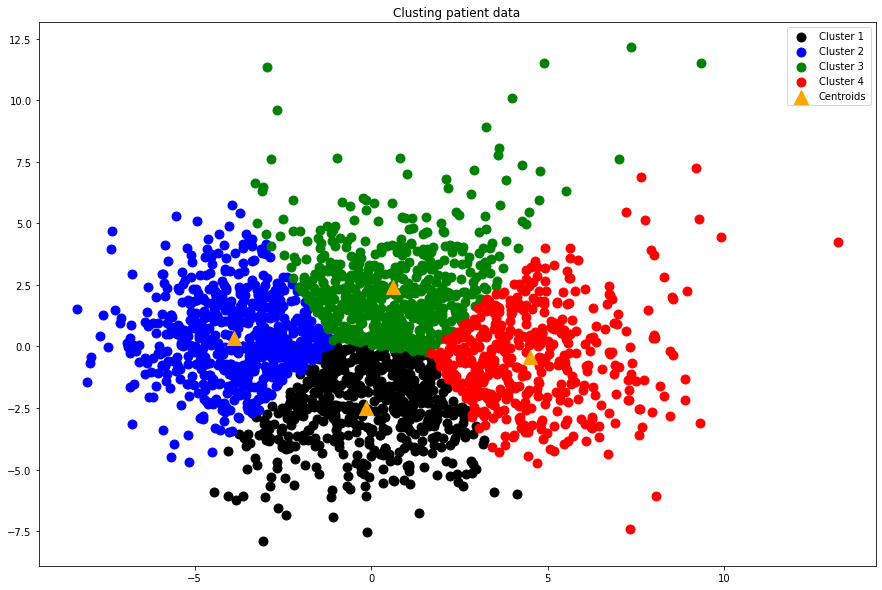

In [25]:
#Visualize the clusters 
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(data[y_kmeans2 == 0, 0], data[y_kmeans2 == 0, 1], s = 80, c = 'black', label = 'Cluster 1')

plt.scatter(data[y_kmeans2 == 1, 0], data[y_kmeans2 == 1, 1], s = 80, c = 'blue', label = 'Cluster 2')

plt.scatter(data[y_kmeans2 == 2, 0], data[y_kmeans2 == 2, 1], s = 80, c = 'green', label = 'Cluster 3')

plt.scatter(data[y_kmeans2 == 3, 0], data[y_kmeans2 == 3, 1], s = 80, c = 'red', label = 'Cluster 4')


plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s = 200, marker ='^', c = 'orange', label = 'Centroids')
plt.title('Clusting patient data')
plt.legend()
plt.show()

## Evaluation of the model 

##### First using Silhoutte score for evaluation

In [26]:
#import
from sklearn.metrics import silhouette_score
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)
kmeans_3.fit_predict(data)
##Silhouette Score = (b-a)/max(a,b)
print('Silhoutte score: ' + str(silhouette_score(data, kmeans_3.labels_)))

Silhoutte score: 0.35023791006383076


In [27]:
from sklearn.metrics import silhouette_score
kmeans_4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 123)
kmeans_4.fit_predict(data)
##Silhouette Score = (b-a)/max(a,b)
print('Silhoutte score: ' + str(silhouette_score(data, kmeans_4.labels_)))

Silhoutte score: 0.34541443829701857


##### Second: Using test dataset to test data ( CONSIDER IT AS NEW DATA WE NEED TO FIND THEIR CLUSTERS  )

#### Use the trained model to preduct test data

In [28]:
#Read file
df = pd.read_csv('ALS_TestingData_78.csv')
df.drop(['ID'], axis=1, inplace=True) 
df.drop(['SubjectID'], axis=1, inplace=True) 
df

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,0.028519,...,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,0.039301,...,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,0.017173,...,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,0.033592,...,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,0.000000,...,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,45.000000,42.0,39.5,37,0.010823,-0.683521,33,28.0,23,0.021645,...,5,0.004329,6.0,5.50,5.0,0.002165,12.45,8.370,5.56,0.014913
74,47.709589,47.0,44.0,41,0.005381,-0.324733,26,19.0,11,0.013453,...,0,0.005381,7.5,6.00,5.5,0.001845,13.92,10.265,8.37,0.004978
75,59.928767,47.0,44.0,40,0.009333,-0.330616,33,24.0,10,0.030667,...,1,0.008000,7.5,6.50,6.0,0.002000,16.69,5.445,4.48,0.016280
76,61.000000,42.0,39.0,38,0.007843,-0.439230,37,33.0,31,0.011765,...,4,0.005882,6.5,6.00,5.5,0.001961,10.66,7.390,5.81,0.009510


In [29]:
#First we need to use pca and normalizaion to preprocessing data
X = df.drop(['ALSFRS_slope'], axis=1)

In [30]:
#Normalization 
nrmlzd = StandardScaler()
data =nrmlzd.fit_transform(X)

In [31]:
#PCA
pca = PCA(2)
data = pca.fit_transform(data)

#### Based on Silhouette Score Results 3 clustrs is better than 4, so I am going to preduct test data with 3 clusters model

In [32]:
#Notice that I just predict based on the alredy trained model :) 
#No training just preduction for test dataset
y_kmeans = kmeans_3.predict(data)

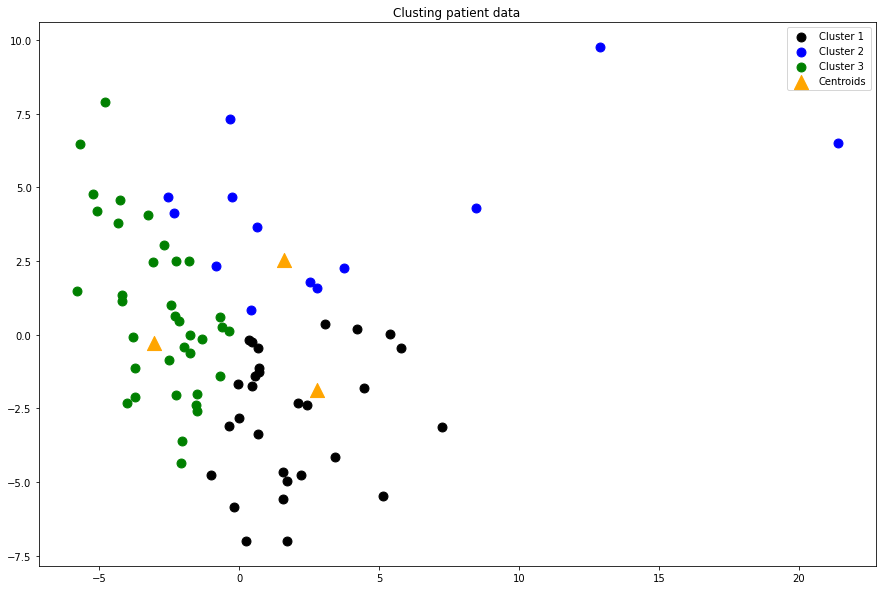

In [33]:
# Visualization
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 80, c = 'black', label = 'Cluster 1')

plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'Cluster 2')

plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], s = 200, marker ='^', c = 'orange', label = 'Centroids')
plt.title('Clusting patient data')
plt.legend()
plt.show()
#Based on the visulaization, I can see the model works good!